In [1]:
import os 
import scipy
import numpy as np
from matplotlib import pyplot as plt
from mne import io
from bids import BIDSLayout
from mne.decoding import TimeFrequency
from matplotlib import pyplot as plt
from scipy import stats, signal
import mne
from mne import create_info, EpochsArray
from mne.time_frequency import tfr_morlet
import pandas as pd

In [8]:
PATH = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\PD_ButtonPress"

In [9]:
def preprocess_mov(mov_dat):
    # the TIME OFF in the TTL signal is ~50 ms
    MOV_ON = False
    mov_new = np.zeros(mov_dat.shape[0])
    mov_new[0] = mov_dat[0]
    mov_on_set = 0
    for i in range(mov_dat.shape[0]):
        if i > 0 and mov_dat[i] > 1:
            MOV_ON = True
            mov_on_set = i 
        if (i - mov_on_set) > 100 and mov_dat[i] < 1: 
            mov_new[i] = 0
            MOV_ON = False
        if MOV_ON is True:
            mov_new[i] = 1
    return mov_new

In [10]:
# run through every patient and every run in the peking dataset and rewrite the TTL label 

In [16]:
def get_all_vhdr_files(BIDS_path):
    """
    
    Given a BIDS path return all vhdr file paths without BIDS_Layout
    Args:
        BIDS_path (string)
    Returns: 
        vhdr_files (list)
    """
    vhdr_files = []
    for root, dirs, files in os.walk(BIDS_path):
        for file in files:
            if file.endswith(".vhdr"):
                vhdr_files.append(os.path.join(root, file))
    return vhdr_files

def get_all_edf_files(BIDS_path):
    """
    
    Given a BIDS path return all vhdr file paths without BIDS_Layout
    Args:
        BIDS_path (string)
    Returns: 
        vhdr_files (list)
    """
    vhdr_files = []
    for root, dirs, files in os.walk(BIDS_path):
        for file in files:
            if file.endswith(".edf"):
                vhdr_files.append(os.path.join(root, file))
    return vhdr_files

In [18]:
edf_files = get_all_edf_files(PATH)

In [90]:
ch_clean = preprocess_mov(raw.get_data()[np.where(np.array(raw.ch_names) == "POL DC10")[0][0],:])

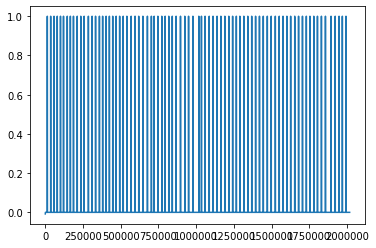

In [91]:
plt.plot(ch_clean)

In [105]:
for edf_file in edf_files:
    print(edf_file)
    raw = mne.io.read_raw_edf(edf_files[8], preload=True)
    if "buttonPress" not in edf_files[1]:
        continue
    raw = mne.io.read_raw_edf(edf_file, preload=True)
    info = mne.create_info(["POL DC10 clean"], raw.info["sfreq"], ch_types='emg')
    raw_clean = mne.io.RawArray(np.expand_dims(ch_clean, axis=0), info)
    raw.add_channels([raw_clean.pick("POL DC10 clean")])
    raw.save(edf_file, overwrite=True)

C:\Users\ICN_admin\Dropbox (Brain Modulation Lab)\Shared Lab Folders\CRCNS\PD_ButtonPress\sub-FOG006\ses-postimp\ieeg\sub-FOG006_ses-postimp_task-buttonPress_run-01_ieeg.edf
Extracting EDF parameters from C:\Users\ICN_admin\Dropbox (Brain Modulation Lab)\Shared Lab Folders\CRCNS\PD_ButtonPress\sub-FOG013\ses-postimp\ieeg\sub-FOG013_ses-postimp_task-buttonPress_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2018174  =      0.000 ...  1009.087 secs...
C:\Users\ICN_admin\Dropbox (Brain Modulation Lab)\Shared Lab Folders\CRCNS\PD_ButtonPress\sub-FOG006\ses-postimp\ieeg\sub-FOG006_ses-postimp_task-restingSit_run-01_ieeg.edf
Extracting EDF parameters from C:\Users\ICN_admin\Dropbox (Brain Modulation Lab)\Shared Lab Folders\CRCNS\PD_ButtonPress\sub-FOG013\ses-postimp\ieeg\sub-FOG013_ses-postimp_task-buttonPress_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ...